To clarify for this chapter:
* What is an Effect in a population
  * is an outcome we are observing as a result of manipulating an input variable (the cause)
  * e.g. effect -> starting a fight, input variable -> drinking alcohol
* How to measure the Effect
  * ???
* What does it mean to fit a statistical model to the data 
  * That's wrong formulation. You rather pick a statistical model and see how well it "fits" to the observed data (by measuring the total error in the "fit")
* How to compute the error of the fitted model 
   * depends on the test statistic. E.g. if the test statistic is a mean -> as error we can use the standard deviation (the smaller the standard deviation the better the mean represents the observed samples)
* What is a test statistic
   * the ratio between the systematic variation vs unsystematic variation (how much of a change does the manipulation of an input variable introduce compared to the random variation of that input variable)
* What does the term "probability of a test statistic" mean
   * there are standardized tables of probabilities for given values of test statistics (just like for z-scores)
* Effect significance vs effect size
   * standardized measure of the magnitude of an observed effect (e.g. Pearson Correlation Coefficient, Cohen's d coefficient)


# Statistical Models

We want to discover some process that occurs in real world. We make a guess about how that process works and derive hypotheses from our guess. How do we prove the hypotheses ? 

Because in practice we can't observe all possible outcomes (the population) we collect some actual outcomes (the samples) and then pick a statistical model that 'fits well enough'. If such model is found  we use it to further study the real process.

The 2 basic idea in working with Statistical Models are given by the equations below:

$
\begin{align}
outcome_i & = model + error_i \\
deviation & = \sum(observed - model)^2 \\
\end{align}
$

# The Simplest Statistical Model - The Mean

In [45]:
library('ggplot2')
options(repr.plot.width=6, repr.plot.height=4)
options(digits=4)
require(gridExtra)

In [56]:
observations <- c(rnorm(70000, 1, 0.5), rnorm(30000, 2, 0.2))
mean_population <- mean(observations)
sample_1 <- sample(observations, length(observations) / 1000, replace = FALSE)
mean_sample <- mean(sample_1)
sprintf('True mean: %f, Sample mean: %f', mean_population, mean_sample)

[1] "True mean: 1.299559, Sample mean: 1.352249"

Warning message:
"Removed 2 rows containing missing values (geom_bar)."

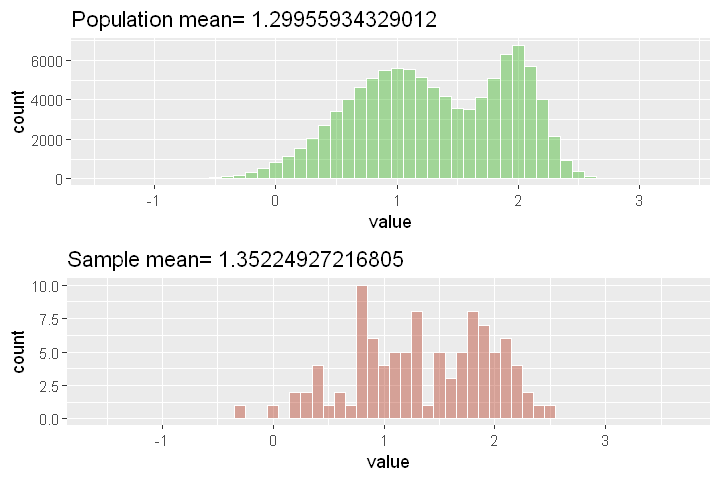

In [57]:
main_plot <- ggplot(data.frame(value=observations), aes(x=value)) + geom_histogram(binwidth=0.1, color="white", fill=rgb(0.2,0.7,0.1,0.4)) + ggtitle(paste('Population mean=', mean_population))
sample_plot <- ggplot(data.frame(value=sample_1), aes(x=value)) + geom_histogram(binwidth=0.1, color="white", fill=rgb(0.7,0.2,0.1,0.4)) + xlim(1.1 * layer_scales(main_plot)$x$range$range) + ggtitle(paste('Sample mean=', mean_sample))
grid.arrange(main_plot, sample_plot, nrow=2)

### The Fit of the Mean
To find how well the mean fits the observed data we can make progressively the following attempts:
* Sum up the differences between the mean and the sample -> we obtain perfect fit (sum of differences is equal to sum of samples - mean * n_samples)
* Square up the differences to avoid cancellation -> then fit is dependent on the number of samples (more sample, bigger the sum of squared differences)
* Divide sum of squares by (n_samples - 1) (**variance**) -> the fit does not depend on the number of samples, however the error unit is squared now
  * We take N-1 instead of N because we assume the sample mean is the population mean and thus need to have 1 sample that can vary in order to keep the mean constant when we take other samples as reference. This is not a mathematical proof but good enough as an intuitive explanation.
* Take the square root of the variance -> **standard deviation**

In [65]:
sprintf('Sum of differences=%f', sum(sample_1 - mean_sample))
sprintf('Sum of squared differences=%f', sum((sample_1 - mean_sample)^2))
sprintf('Variance=%f, (built-in var()=%f)', sum((sample_1 - mean_sample)^2) / (length(sample_1) - 1), var(sample_1))
sprintf('Standard deviation=%f, (built-in sd() =%f)', sqrt(sum((sample_1 - mean_sample)^2) / (length(sample_1) - 1)), sd(sample_1))


[1] "Sum of differences=0.000000"

[1] "Sum of squared differences=37.388172"

[1] "Variance=0.377658, (built-in var()=0.377658)"

[1] "Standard deviation=0.614539, (built-in sd() =0.614539)"

<div class='alert alert-danger'>
What is the maximal ratio between the standard deviation and the mean that allows us to claim that the mean is a 'good fit' for the observed data ? (The ratio is know as <b>Coefficient of Variation</b> and makes sense to compute only for Ratio variables)
</div>